#Pipeline
1. Đọc dữ liệu
2. Xây dựng hệ thống bằng phương pháp Demographic Filtering
3. Xây dựng hệ thống bằng phương pháp Content Base Filtering
  - Xây dựng bằng tổng quan phim
  - Xây dựng bằng thông tin của bộ phin: Đạo diễn, diễn viên, thể loại, keywords
4. Xây dựng hệ thống bằng phương pháp Collaborative Filtering bằng SVD

# Đọc dữ liệu

## Tập dữ liệu
**credits** bao gồm các đặc trưng sau:

* **movie_id**: id của phim
* **cast**: tên của các diễn viên chính và phụ.
* **crew**: tên của các nhân viên trong quá trình sản xuất phim (đạo diễn, editor, người soạn nhạc, v.v.)

**movies** bao gồm các đặc trưng sau:

* **budget**: kinh phí thực hiện bộ phim.
* **genre**: các thể loại của phim.
* **homepage**: liên kết đến trang chủ của bộ phim.
* **id**: thông tin về movie_id như trong tập dữ liệu tmdb_5000_credits.
* **keywords**: các từ khóa hoặc thẻ liên quan đến bộ phim.
* **original_language**: ngôn ngữ trong bộ phim sử dụng.
* **original_title**: tên phim trước khi dịch hoặc chuyển thể.
* **overview**: mô tả ngắn gọn về bộ phim.
* **popularity**: số lượng chỉ định mức độ phổ biến của bộ phim.
* **production_companies**: nhà sản xuất của bộ phim.
* **production_countries**: quốc gia sản xuất của bộ phim.
* **release_date**: ngày mà nó được phát hành.
* **revenue**: doanh thu trên toàn thế giới do bộ phim tạo ra.
* **runtime**: thời gian  của phim tính bằng phút.
* **status**: Đã phát hành hoặc còn là tin đồn.
* **tagline**: khẩu hiệu của phim.
* **title**: tên phim.
* **vote_average**: đánh giá trung bình mà bộ phim nhận được.
* **vote_count**: số lượng đánh giá.

## 1. Chuẩn bị dư liệu

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Đọc dữ liệu credits và movies và kết hợp 2 dữ liệu thành một dataframe.
credits_df = pd.read_csv('/content/drive/MyDrive/Asm_3/credits.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/Asm_3/movies.csv')
df = movies_df.merge(right=credits_df, how='inner', left_on=['id','title'], right_on=['movie_id', 'title'])
df = df.drop(labels=["original_title", "id"], axis=1)
df.head()

,budget,genres,homepage,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#Điều chỉnh định dạng của một số cột dữ liệu để có thể xử lý dữ liệu hiệu quả hơn về sau.
from ast import literal_eval
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
  df[feature] = df[feature].apply(literal_eval)

#Trực quan biểu đồ trực quan 10 bộ phim phổ biến nhất hiện nay bằng chỉ số popularity.

Text(0.5, 0, 'Popularity')

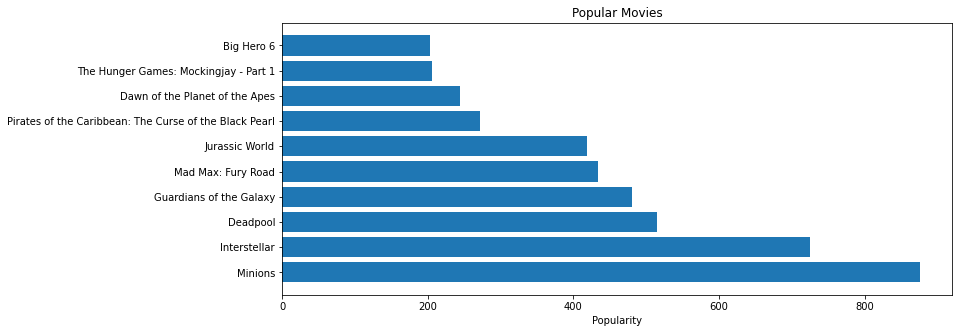

In [15]:
tmp = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12,5))
plt.barh(list(tmp['title']), list(tmp['popularity']))
plt.title('Popular Movies')
plt.xlabel('Popularity')

#2.Xây dựng hệ thống bằng phương pháp Demographic Filtering
Chúng ta sẽ sử dụng phương pháp IMDB's weighted rating (wr) 

![](https://image.ibb.co/jYWZp9/wr.png)

Trong đó:

* v: số lượng đánh giá cho mỗi bộ phim.
* m: số đánh giá tối thiểu cần thiết để được liệt kê.
* R: đánh giá trung bình của mỗi bộ phim.
* C: giá trị trung bình của các đánh giá trung bình của từng bộ phim.

In [6]:
# Tính giá trị C
C = df['vote_average'].mean()
C

6.092171559442016

In [7]:
# Tính giá trị m. Sử dụng số lượng vote chiếm 90% của toàn bộ dữ liệu để thiết lập cho m
m = df['vote_count'].describe(percentiles=[0.9])["90%"]
m

1838.4000000000015

In [9]:
# Lọc những bộ phim có số lượng đánh giá ít nhất bằng m
move_rating = df[df['vote_count'] >= m]
move_rating.shape

(481, 21)

In [10]:
# Tính điểm cho từng bộ phim bằng hàm weighted_rating
q_movies = move_rating.copy()[['title', 'vote_count', 'vote_average']]
q_movies['score'] = q_movies['vote_count']*q_movies['vote_average']/(q_movies['vote_count']+m) + m*C/(q_movies['vote_count']+m)

In [14]:
# Đề xuất 10 bộ phim dựa vào phương pháp đề xuất Demographic Filtering
q_movies.sort_values(by="score", ascending=False, inplace=True)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


# 3.Xây dựng hệ thống bằng phương pháp Content Based Filtering
Trong hệ thống đề xuất này, nội dung của phim (overview, cast, crew, keyword, v.v.) được sử dụng để tìm sự tương đồng của giữa các bộ phim.

In [16]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

## Dựa trên Overview

### Tính IF-IDF cho toàn bộ overview

In [18]:
# preprocessing
df['overview'].fillna(value='', inplace=True)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['overview'])
tfidf_matrix.shape

(4803, 21262)

### Tính ma trận tương tự cho overview từ TF-IDF sử dụng cosine similarity

In [20]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(4803, 4803)

###  Xây dựng hàm để đề xuất phim dựa vào tổng quan của phim

In [21]:
indices = pd.Series(data=df.index, index=df['title']).drop_duplicates()

In [22]:
def get_recommendations(df, title, cosine_sim=cosine_sim):
  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  movie_indeces = [i[0] for i in sim_scores]
  return df['title'].iloc[movie_indeces]

In [23]:
get_recommendations(df, 'The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
1181                                        JFK
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [24]:
get_recommendations(df, 'The Avengers')

7                   Avengers: Age of Ultron
3311                  Thank You for Smoking
4124                     This Thing of Ours
3144                                Plastic
588         Wall Street: Money Never Sleeps
4620                   Fighting Tommy Riley
1892                             The Losers
2433       Superman IV: The Quest for Peace
85      Captain America: The Winter Soldier
580                      Olympus Has Fallen
Name: title, dtype: object

## Dựa trên tên đạo diễn, 3 diễn viên hàng đầu, thể loại và keywords

In [25]:
# Lấy tên đạo diễn
tmp1 = []
for i in df['crew']:
  tmp = []
  for j in i:
    if j['job'] == 'Director':
      tmp.append(j['name'])
  tmp1.append(tmp)
df['director'] = tmp1

In [27]:
# Lấy ra 3 diễn viên, 3 keywords và 3 genres hàng đầu
def get_name(datas):
  result = []
  for data in datas:
    names = []
    for name in data[:3]:
      names.append(name['name'])
    result.append(names)
  return result
for i in ['cast', 'keywords', 'genres']:
  df[i] = get_name(df[i])

In [28]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


### Preprocessing data. Tránh trường hợp từ Johnny của "Johnny Depp" và "Johnny Galecki" là giống nhau.

In [29]:
def adjust_data(data):
  if isinstance(data, str):
    return str.lower(data.replace(' ', ''))
  elif isinstance(data, list):
    return [str.lower(i.replace(' ', '')) for i in data]
  else: return ''
for i in ['cast', 'director', 'keywords', 'genres']:
  df[i] = df[i].apply(adjust_data)

In [30]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron],"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",[goreverbinski],"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",[sammendes],"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",[christophernolan],"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",[andrewstanton],"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


### Kết hợp dữ liệu của từng giá trị trong keywords, cast, director, genres thành một chuỗi và lưu vào cột movie_info

In [31]:
def combine_data(data):
  return ' '.join(data['keywords']) + ' ' + ' '.join(data['cast']) + ' ' + ' '.join(data['genres'])
df['movie_info'] = df[['cast', 'director', 'keywords', 'genres']].apply(combine_data, axis=1)
df['movie_info'].head()

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: movie_info, dtype: object

### Tính CountVectorizer cho từng movie_info

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['movie_info'])

In [33]:
# Tính ma trận tương tự cho movie_info từ CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(x, x)

In [34]:
get_recommendations(df, 'The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object

In [35]:
get_recommendations(df, 'The Godfather', cosine_sim2)

867      The Godfather: Part III
2649           The Son of No One
4638    Amidst the Devil's Wings
1170     The Talented Mr. Ripley
1394               Donnie Brasco
1850                    Scarface
2280                 Sea of Love
2731      The Godfather: Part II
2792         Glengarry Glen Ross
3450             West Side Story
Name: title, dtype: object

#4.Xây dựng hệ thống bằng phương pháp Collaborative Filtering bằng SVD

Nhược điểm của Lọc Cộng tác là về khả năng mở rộng (scalability) và độ thưa thớt (sparsity). Để xử lý vấn đề này chúng ta có thể sử dụng latent factor model (mô hình yếu tố tiềm ẩn) để nắm bắt sử giống nhau của người dùng và mặt hàng.

##Đọc dữ liệu đánh giá phim của người dùng.

In [2]:
user_ratings_df = pd.read_csv("/content/drive/MyDrive/Asm_3/user_ratings.csv")
user_ratings_df.head()

,user_id,movie_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Sử dụng K-Fold để huấn luyện và đánh giá mô hình

In [4]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366558 sha256=11506e06c3d8efed04f5f151f5a54e20306bc0e94afe1ba78932805545d12ade
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [6]:
from surprise import Reader, Dataset
import os
reader = Reader()
data = Dataset.load_from_df(user_ratings_df[["user_id", "movie_id", "rating"]], reader=reader)
data

In [10]:
from surprise.model_selection import KFold
from surprise import accuracy, SVD

kf = KFold(n_splits=3)
algo = SVD()
for trainset, testset in kf.split(data):
  algo.fit(trainset)
  pred = algo.test(testset)
  accuracy.rmse(pred, verbose=True)

RMSE: 0.9045
RMSE: 0.9007
RMSE: 0.9074


Root Mean Sqaure Error trung bình là 0,90, là quá đủ tốt cho trường hợp của chúng ta.

In [11]:
#dự đoán kết quả người dùng có id = 1 với phim có id là 302.
algo.predict(1,302)

Prediction(uid=1, iid=302, r_ui=None, est=2.7938148891915215, details={'was_impossible': False})